Phone Classification Dataset

Dataset Overview: A collection of features characterizing mobile phones, including battery power,
camera specifications, network support, memory, screen dimensions, and other attributes. 
The 'price_range' column categorizes phones into price ranges, making this dataset
suitable for mobile phone classification and price prediction tasks.
Source: https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset?select=train.csv

Summary : predicting the price of a cell phone based on various features.

Mobile Phone Classification and Price Prediction Dataset

In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats


from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#METRICS ELVAULUATION

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier 


from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.compose import make_column_selector
import warnings
warnings.filterwarnings('ignore')

In [703]:
phone_csv = 'Phone Classification Dataset.csv'

In [704]:
phone = pd.read_csv('Phone Classification Dataset.csv')

In [705]:
phone.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [706]:
phone.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [707]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [708]:
phone.shape

(2000, 21)

In [709]:
phone.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [710]:
null_counts = phone.isnull().sum()
print(null_counts)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [711]:
duplicateValues = phone.duplicated()
print(duplicateValues.sum())
phone[duplicateValues]

0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [712]:
phone.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [713]:
phone.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [714]:
#box plot of all columns in data set

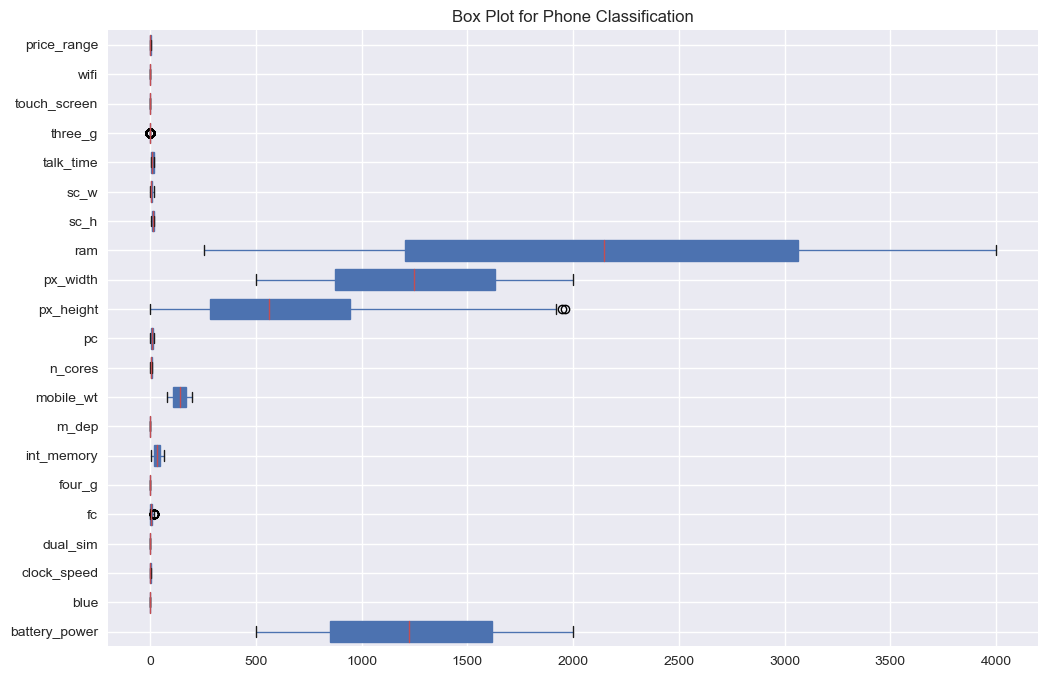

In [715]:
# Perform EDA by investigating each of the points above

# Specify the numeric columns for box plot
numeric_columns = phone.select_dtypes(include=['float64', 'int64']).columns

# Create a box plot for numeric columns
plt.figure(figsize=(12, 8))
phone[numeric_columns].boxplot(sym='o', vert=False, patch_artist=True, widths=0.7)
plt.title('Box Plot for Phone Classification')
plt.show()

In [716]:
#Plot px_width vs. px_height due to similarity

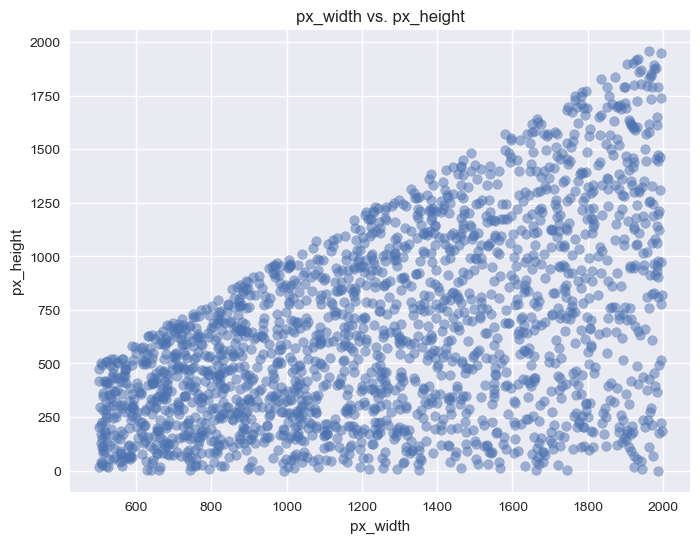

In [717]:
# Select the 'px_width' and 'px_height' columns
px_width_data = phone['px_width']
px_height_data = phone['px_height']

# Create a scatterplot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(px_width_data, px_height_data, alpha=0.5)
plt.xlabel('px_width')
plt.ylabel('px_height')
plt.title('px_width vs. px_height')
plt.grid(True)  # Optional: Add grid lines

# Show the scatterplot
plt.show()

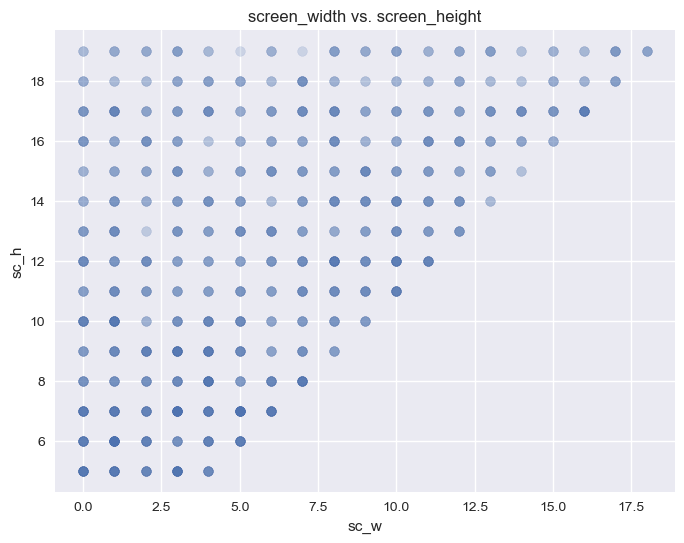

In [718]:
# Select the 'px_width' and 'px_height' columns
sc_w_data = phone['sc_w']
sc_h_data = phone['sc_h']

# Create a scatterplot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(sc_w_data, sc_h_data, alpha=0.10)
plt.xlabel('sc_w')
plt.ylabel('sc_h')
plt.title('screen_width vs. screen_height')
plt.grid(True)  # Optional: Add grid lines

# Show the scatterplot
plt.show()

In [719]:
#Plot ram vs. battery_power due to similarity

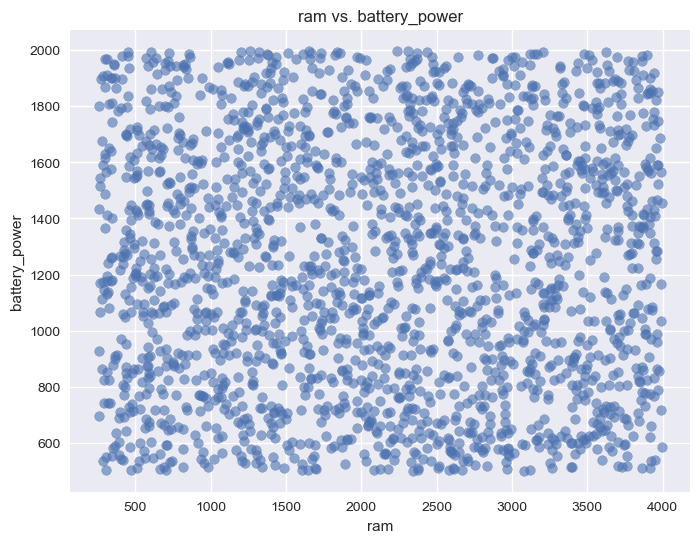

In [720]:
ram_data = phone['ram']
battery_power_data = phone['battery_power']

# Create a scatterplot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(ram_data, battery_power_data, alpha=0.6)
plt.xlabel('ram')
plt.ylabel('battery_power')
plt.title('ram vs. battery_power')
plt.grid(True)  # Optional: Add grid lines

# Show the scatterplot
plt.show()

In [721]:
# Bar Chart: px_width, px_height, ram, and battery_power

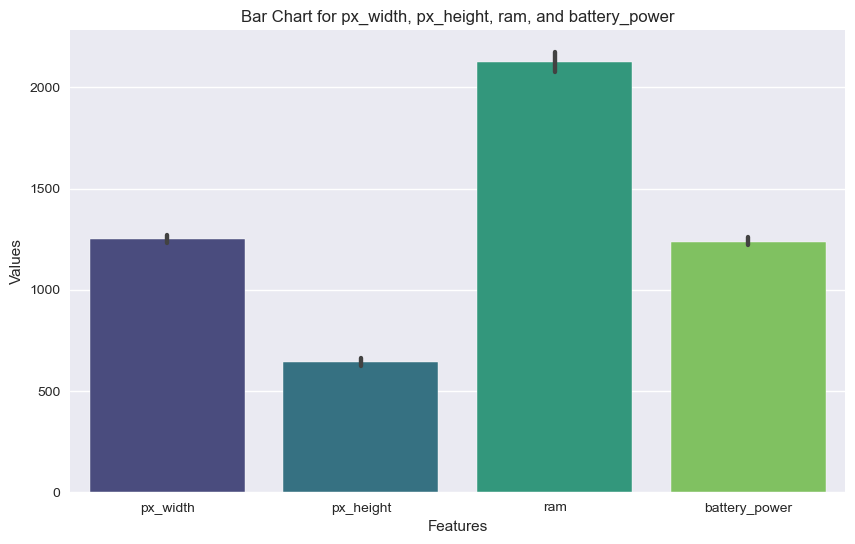

In [722]:
selected_columns = ['px_width', 'px_height', 'ram', 'battery_power']
df_subset = phone[selected_columns]

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.barplot(data=df_subset, palette='viridis')

# Customize labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Bar Chart for px_width, px_height, ram, and battery_power')

# Show the plot
plt.show()

In [723]:
#Line Graph for Selected Features in Phone Dataset

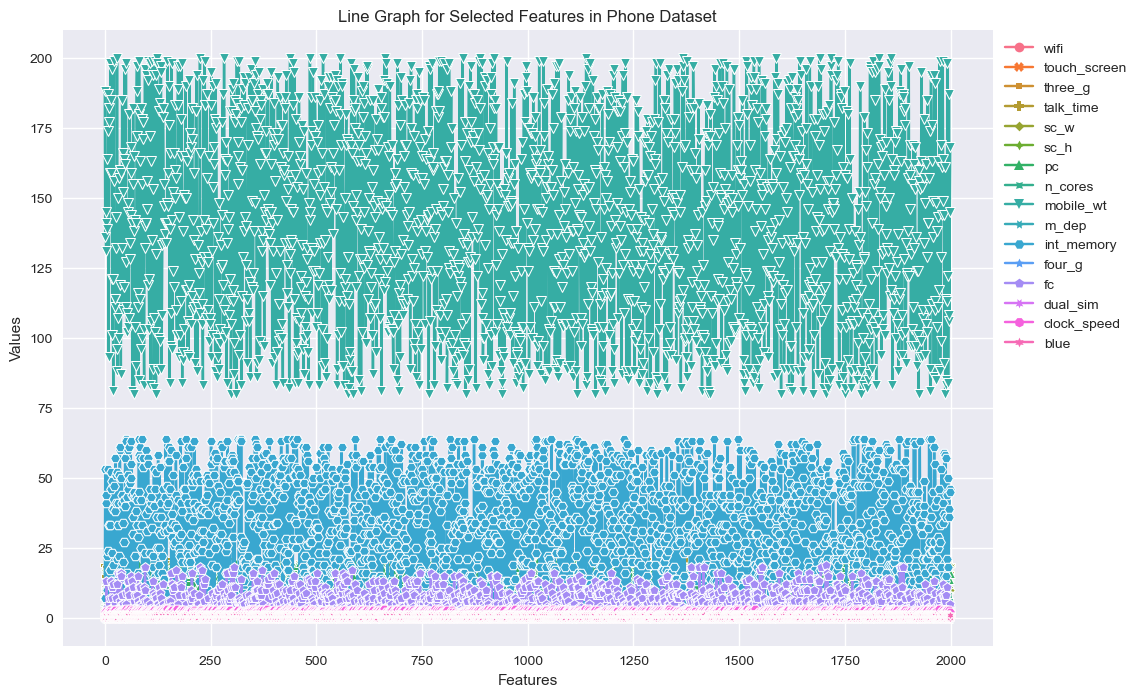

In [724]:
selected_columns = ['wifi', 'touch_screen', 'three_g', 'talk_time', 'sc_w', 'sc_h', 'pc', 'n_cores',
                     'mobile_wt', 'm_dep', 'int_memory', 'four_g', 'fc', 'dual_sim', 'clock_speed', 'blue']
df_subset = phone[selected_columns]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a line graph
sns.lineplot(data=df_subset, dashes=False, markers=True)

# Customize labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Line Graph for Selected Features in Phone Dataset')

# Show the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Optional: Adjust the legend position
plt.show()

In [725]:
#review price field

In [726]:
#review phone memory with price / known factor for price change when purchasing phones.


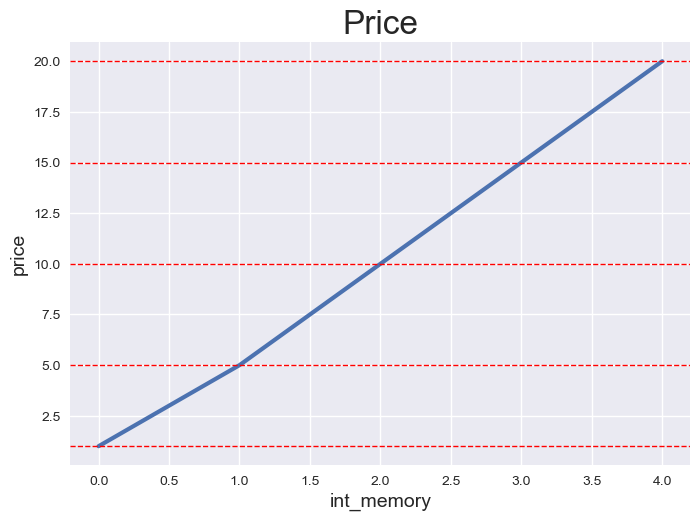

In [727]:
plt.style.use('seaborn-v0_8')

price = [1, 5, 10, 15, 20]

fig, ax = plt.subplots()

# Plot the line
ax.plot(price, linewidth=3)

# Add a red axis line for the specified points
for point in price:
    ax.axhline(y=point, color='red', linestyle='--', linewidth=1)

ax.set_title('Price', fontsize=24)
ax.set_xlabel("int_memory", fontsize=14)
ax.set_ylabel("price", fontsize=14)

plt.show()

feature engerning 
phone hight and width 
phone screen and hight

In [728]:
phone['px_heighxwidth'] =phone['px_height']*phone['px_width']
phone['sc_hxw'] = phone['sc_h']*phone['sc_w']

In [729]:
X = phone.drop('price_range', axis=1)  # Features
y = phone['price_range']  # Target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # You can choose the number of components or the explained variance

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

modeling 

In [730]:
# Random Forest with Original Data
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
rf_predictions = rf_original.predict(X_test)

# Evaluate the classifier
print("Random Forest Classifier with Original Data:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("="*40 + "\n")

# Random Forest with Scaled Data
rf_scaled = RandomForestClassifier(random_state=42)
rf_scaled.fit(X_train_scaled, y_train)
rf_predictions = rf_scaled.predict(X_test_scaled)

# Evaluate the classifier
print("Random Forest Classifier with Scaled Data:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("="*40 + "\n")

# Random Forest with PCA-transformed Data
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
rf_predictions = rf_pca.predict(X_test_pca)

# Evaluate the classifier
print("Random Forest Classifier with PCA-transformed Data:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classifier with Original Data:
Accuracy: 0.9075
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.87      0.88      0.87        91
           2       0.84      0.88      0.86        92
           3       0.96      0.91      0.94       112

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400


Random Forest Classifier with Scaled Data:
Accuracy: 0.9075
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.86      0.88      0.87        91
           2       0.85      0.88      0.87        92
           3       0.96      0.92      0.94       112

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg  

SVM Testing

In [737]:
#Support Vector Machine (SVM) with Original Data
svm_original = SVC(random_state=42)
svm_original.fit(X_train, y_train)
svm_predictions = svm_original.predict(X_test)

# Evaluate the classifier
print("SVM Classifier with Original Data:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions, zero_division=1))
print("="*40 + "\n")

# Support Vector Machine (SVM) with Scaled Data
svm_scaled = SVC(random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
svm_predictions = svm_scaled.predict(X_test_scaled)

# Evaluate the classifier
print("SVM Classifier with Scaled Data:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions, zero_division=1))
print("="*40 + "\n")

# Support Vector Machine (SVM) with PCA-transformed Data
svm_pca = SVC(random_state=42)
svm_pca.fit(X_train_pca, y_train)
svm_predictions = svm_pca.predict(X_test_pca)

# Evaluate the classifier
print("SVM Classifier with PCA-transformed Data:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions, zero_division=1))

SVM Classifier with Original Data:
Accuracy: 0.3125
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.58      0.39       105
           1       0.21      0.21      0.21        91
           2       1.00      0.00      0.00        92
           3       0.44      0.40      0.42       112

    accuracy                           0.31       400
   macro avg       0.49      0.30      0.25       400
weighted avg       0.48      0.31      0.27       400


SVM Classifier with Scaled Data:
Accuracy: 0.8825
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.79      0.87      0.83        91
           2       0.82      0.79      0.81        92
           3       0.96      0.91      0.94       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88 

In [732]:
#GaussianNB / especially in high-dimensional datasets

In [733]:

NB_original = GaussianNB()
NB_original.fit(X_train, y_train)
NB_predictions = NB_original.predict(X_test)

# Evaluate the classifier
print("GaussianNB with Original Data:")
print("Accuracy:", accuracy_score(y_test, NB_predictions))
print("Classification Report:\n", classification_report(y_test, NB_predictions, zero_division=1))
print("="*40 + "\n")

# (NB) with Scaled Data
NB_scaled = GaussianNB()
NB_scaled.fit(X_train_scaled, y_train)
NB_predictions = NB_scaled.predict(X_test_scaled)

# Evaluate the classifier
print("GaussianNB with Scaled Data:")
print("Accuracy:", accuracy_score(y_test, NB_predictions))
print("Classification Report:\n", classification_report(y_test, NB_predictions, zero_division=1))
print("="*40 + "\n")

#(NB) with PCA-transformed Data
NB_pca = GaussianNB()
NB_pca.fit(X_train_pca, y_train)
NB_predictions = NB_pca.predict(X_test_pca)

# Evaluate the classifier
print("GaussianNB with PCA-transformed Data:")
print("Accuracy:", accuracy_score(y_test, NB_predictions))
print("Classification Report:\n", classification_report(y_test, NB_predictions, zero_division=1))

GaussianNB with Original Data:
Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       105
           1       0.74      0.70      0.72        91
           2       0.66      0.79      0.72        92
           3       0.92      0.85      0.88       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400


GaussianNB with Scaled Data:
Accuracy: 0.8025
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.75      0.67      0.71        91
           2       0.66      0.77      0.71        92
           3       0.90      0.84      0.87       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.80      0.8

In [734]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_classifier = grid_search.best_estimator_

cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

y_pred = best_rf_classifier.predict(X_test)
print("\nRandom Forest Classifier (Best Parameters) - Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Cross-Validation Scores: [0.865625 0.903125 0.875    0.8625   0.85    ]
Mean CV Score: 0.8712499999999999

Random Forest Classifier (Best Parameters) - Test Set:
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.83      0.85      0.84        91
           2       0.80      0.80      0.80        92
           3       0.93      0.89      0.91       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



In [735]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svm_classifier = SVC(random_state=42)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)


print("Best Parameters:", grid_search.best_params_)

best_svm_classifier = grid_search.best_estimator_

cv_scores = cross_val_score(best_svm_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

y_pred = best_svm_classifier.predict(X_test_pca)
print("\nSVM Classifier (Best Parameters) - Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation Scores: [0.95625  0.959375 0.9625   0.9375   0.9625  ]
Mean CV Score: 0.9556250000000001

SVM Classifier (Best Parameters) - Test Set:
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.96      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Change date of price column.
finds rows where the 'price' is equal to 3 and changes those values to 2. This type of operation is useful 
for making specific changes to data based on certain conditions.

In [736]:
#create a sample dataframe for price 
price = pd.DataFrame({'price': [0, 1, 2, 3]})

# update the values in my_column
price.loc[price['price'] == 3, 'price'] = 2
price.loc[price['price'] == 0, 'price'] = 1

# display the updated dataframe
print(price)

   price
0      1
1      1
2      2
3      2


In [685]:
# Assuming int_memory is a list
int_memory = []

# Convert the list to a NumPy array
int_memory_array = np.array(int_memory_list)

# Reshape the array
x = int_memory_array.reshape(-1, 2, 3, 4)
x

array([], shape=(0, 2, 3, 4), dtype=float64)

In [686]:
y = price
y

,price
0,1
1,1
2,2
3,2


In [687]:

phone['price_range'].value_counts(normalize=True)
#results of 1 and 0 for quoted column

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [688]:
selected_columns = ['px_width', 'px_height', 'ram', 'battery_power']
df_subset = phone[selected_columns]
print(selected_columns)

['px_width', 'px_height', 'ram', 'battery_power']


In [689]:
selected_columns = ['px_width', 'px_height', 'ram', 'battery_power', 'price_range']

# Create a new DataFrame with only the selected columns
new_dataset = phone[selected_columns]

# Display the new DataFrame
print(new_dataset)

      px_width  px_height   ram  battery_power  price_range
0          756         20  2549            842            1
1         1988        905  2631           1021            2
2         1716       1263  2603            563            2
3         1786       1216  2769            615            2
4         1212       1208  1411           1821            1
...        ...        ...   ...            ...          ...
1995      1890       1222   668            794            0
1996      1965        915  2032           1965            2
1997      1632        868  3057           1911            3
1998       670        336   869           1512            0
1999       754        483  3919            510            3

[2000 rows x 5 columns]


In [690]:
x = new_dataset.drop('price_range',axis=1)  #['px_width', 'px_height', 'ram', 'battery_power']
x.head()

,px_width,px_height,ram,battery_power
0,756,20,2549,842
1,1988,905,2631,1021
2,1716,1263,2603,563
3,1786,1216,2769,615
4,1212,1208,1411,1821


In [691]:
y = new_dataset['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

KNeighborsClassifier

In [692]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming new_dataset is your DataFrame
# Specify features and target variable
X = new_dataset[['px_width', 'px_height', 'ram', 'battery_power']]
y = new_dataset['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier (you can adjust the number of neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.89      0.93      0.91        91
           2       0.88      0.87      0.87        92
           3       0.95      0.93      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



Provide a visual for final results:
provides a visual representation of the confusion matrix and outputs from
classification report and accuracy. The confusion matrix visualizes true positives, true negatives,
false positives, and false negatives, while the classification report
includes metrics such as precision, recall, and F1-score for each class.

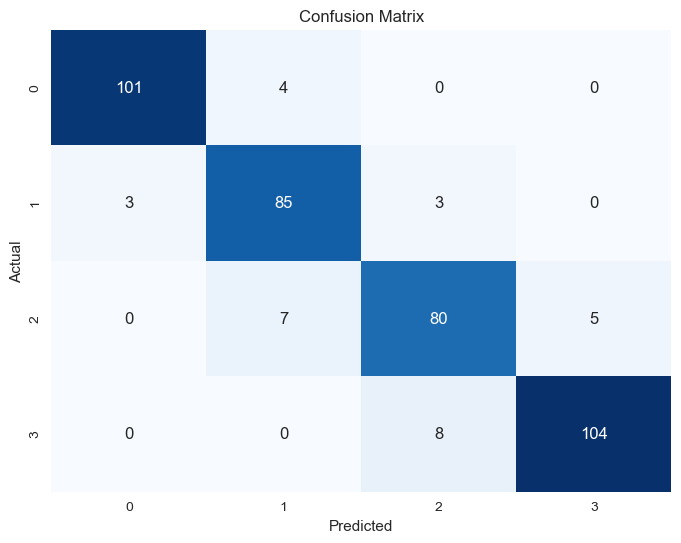

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.89      0.93      0.91        91
           2       0.88      0.87      0.87        92
           3       0.95      0.93      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400

Accuracy: 92.50%


In [693]:
# Evaluate the model
accuracy = knn_classifier.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print("Classification Report:\n", classification_rep)

# Display accuracy
print(f"Accuracy: {accuracy:.2%}")

In the analysis of the tested data, it was observed that the prediction accuracy significantly improved when focusing on specific features, namely 'px_width', 'px_height', 'ram', and 'battery_power', compared to including all columns. Specifically, when evaluating the 'price_range' based on these selected hardware features, the model demonstrated higher accuracy for price ranges 2 and 3.

Contrastingly, the initial test, which included all columns, resulted in lower accuracy. This suggests that certain features may have contributed noise or complexity to the model, affecting its predictive performance.